Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 03: Analysis of behavioural data

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 7, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will start to work on a real dataset from an ongoing experiment. In this experiment the participants were asked to freely explore an unknown virtual city, called Seahaven, with an interactive map. After a sufficiently long exploration the participants were tested on three different tasks: 

- the **absolute orientation** of a single house towards the north cardinal direction
- the **relative orientation** between two houses 
- **pointing** from the location of one house to the other

Each task type was performed in two time conditions:

- **3 seconds** for spontaneous decisions
- **infinite** response time for cognitive reasoning

These measurements were repeated up to three times on different days.

We will provide you with more detailed information about this experiment in the tutorial. If you are interested in more than this feel free to have a look at the paper https://www.biorxiv.org/content/10.1101/539080v1.

A small side remark to the dataset: The RTs for the absolute task are exactly the same for both time conditions. This is an error that cannot be corrected on a short notice. Please keep that in mind, when you evaluate your plots.

## Assignment 0: Peer review for sheet 02 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 11, 9 | 5, 1  | 8, 2  | 2, 7 | 10, 6 | 7, 11 | 6, 5  | 4, 3  | 3, 8  | 1, 4   | 9, 10  |

## Assignment 1: Preprocessing [3 pts]

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

### a) Preprocessing the data [1 pt]

First of all you should preprocess the data. This is an important step to avoid running into any problems when you start to analyse the data. Since we provide the Seahaven dataset as an excel file make sure to run ```pip install xlrd``` in your activated acc environment beforehand. This allows you to directly read from excel files.

- Import the data of all three tasks (Absolute, Relative, Pointing) into one dataframe. Since we don't need the whole data, load only the columns "ReactionTime", "AngularDiffBin", "Subject", "Task", "Time", "Answer" and "Measurement".
- Clean the dataframe of all NaNs, i.e. remove all rows where at least one element is missing. How many rows have been removed?
- Change the values of the column "Answer". Replace each value "wrong" with 0 and each value "correct" with 1.

In [13]:
#get all the data
absolute = pd.read_excel('Seahaven_dataset.xlsx')
relative = pd.read_excel('Seahaven_dataset.xlsx',sheet_name='RelativeTask')
pointing = pd.read_excel('Seahaven_dataset.xlsx',sheet_name='PointingTask')
#concatenate data
data = pd.concat([absolute,relative,pointing])

#load defined columns
data = data[['ReactionTime', 'AngularDiffBin', 'Subject', 'Task', 'Time', 'Answer' , 'Measurement']]
#drop NaN's
clean_data = data.dropna()
#calculate dropped lines
print((len(data)-len(clean_data)),"rows were remowed left,while cleaning the dataframe of all NAN s.",len(clean_data), "rows are left.")
#convert Answers into bool's
clean_data['Answer'] = (clean_data['Answer'] != 'wrong').astype(int)
print(clean_data.head())

C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


1301 rows were remowed left,while cleaning the dataframe of all NAN s. 20083 rows are left.
   ReactionTime  AngularDiffBin  Subject      Task  Time  Answer  Measurement
0      1.664824           150.0   1216.0  Absolute  3sec       0          1.0
1      0.865788            30.0   1216.0  Absolute  3sec       1          1.0
2      1.284187            60.0   1216.0  Absolute  3sec       0          1.0
3      2.081390           180.0   1216.0  Absolute  3sec       0          1.0
4      1.424746           120.0   1216.0  Absolute  3sec       1          1.0


### b) Checking the distribution of the data [2 pts]

Most of the analysis techniques require normally distributed data. To get an idea on how the data looks like use the **preprocessed data** from 1.a) and plot for each task a violinplot that displays the data distribution of the RTs (note that you also have to distinguish between the two time conditions - 3sec and Infinite).

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the mean RT per subject.
- Make a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- Hint: Play with the keyword inner.
- Using your plots, what can you say about the distribution of the data? It is normally distributed? How is it skewed?

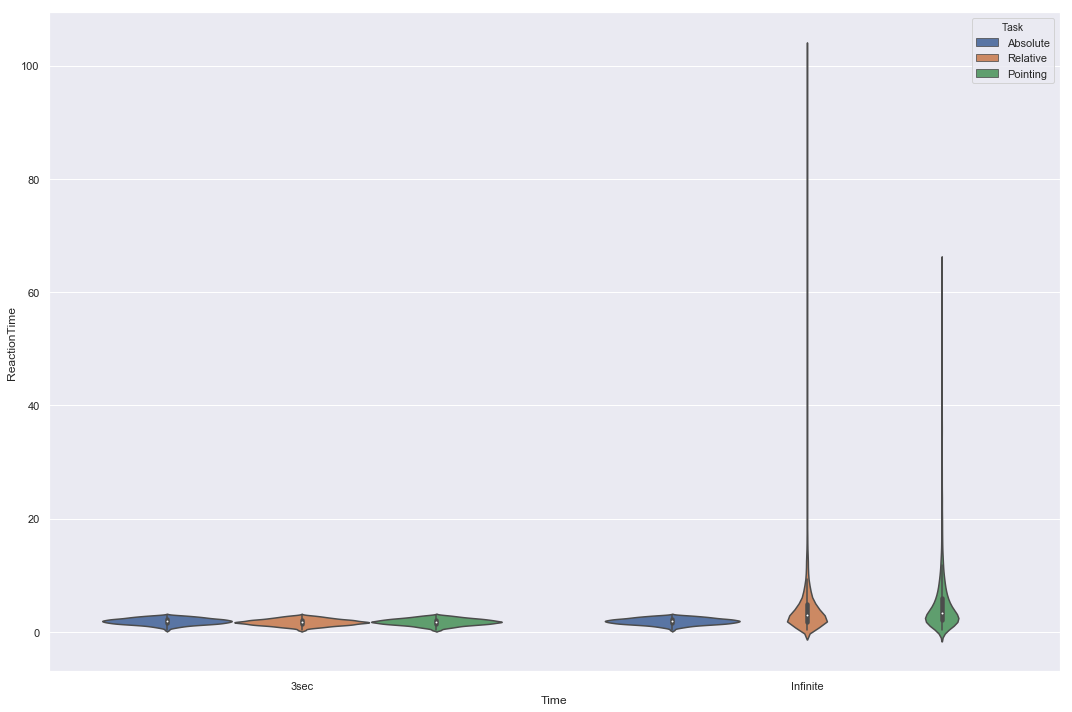

In [14]:
#plotting
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(data = clean_data, y = 'ReactionTime',x='Time', hue= 'Task')

fig.tight_layout()

In [15]:
#get means of the RT's in the same Task and Time condition
means = pd.DataFrame()

means['MeanRT'] = clean_data.groupby(['Task','Time'])['ReactionTime'].mean()
means = means.reset_index()
print("As we can already see in the plots, the data is relatively normally distributed (-> comparable, pretty similar ). However we can clearly see, that the data of the realtive- and the pointing-task are skewed to higher RTs(->in the plots and calculated means below). This is a hint for extreme outliers within the data.    \n \n " ,means)

As we can already see in the plots, the data is relatively normally distributed (-> comparable, pretty similar ). However we can clearly see, that the data of the realtive- and the pointing-task are skewed to higher RTs(->in the plots and calculated means below). This is a hint for extreme outliers within the data.    
 
         Task      Time    MeanRT
0  Absolute      3sec  1.896475
1  Absolute  Infinite  1.896475
2  Pointing      3sec  1.788829
3  Pointing  Infinite  4.902329
4  Relative      3sec  1.735140
5  Relative  Infinite  4.065739


You may have noticed that there are (extreme) outliers, that have to be removed from the **preprocessed data**.

- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) look at the RTs and keep only the ones that are within +2 and -2 standard deviation:

$ |(RT_{group1} - mean(RT_{group1}))| \leq (2*std(RT_{group1})) $

$group1$ = e.g. data of absolute task for time condition 3sec

- Make again a violinplot for each combination of task and time condition (you should end up with 6 violinplots). Make sure that the data distributions are displayed clearly and that the y-axes are uniformly scaled to make your plots comparable. You may split up the single plots for a better overview.
- How does the distribution of the data look now? Is it still skewed?

Even after the removal of outliers, the data of the realtive- and the pointing-task are  still skewed to higher RTs 

        Task      Time    MeanRT
0  Absolute      3sec  1.896475
1  Absolute  Infinite  1.896475
2  Pointing      3sec  1.788829
3  Pointing  Infinite  3.432668
4  Relative      3sec  1.735140
5  Relative  Infinite  3.205469


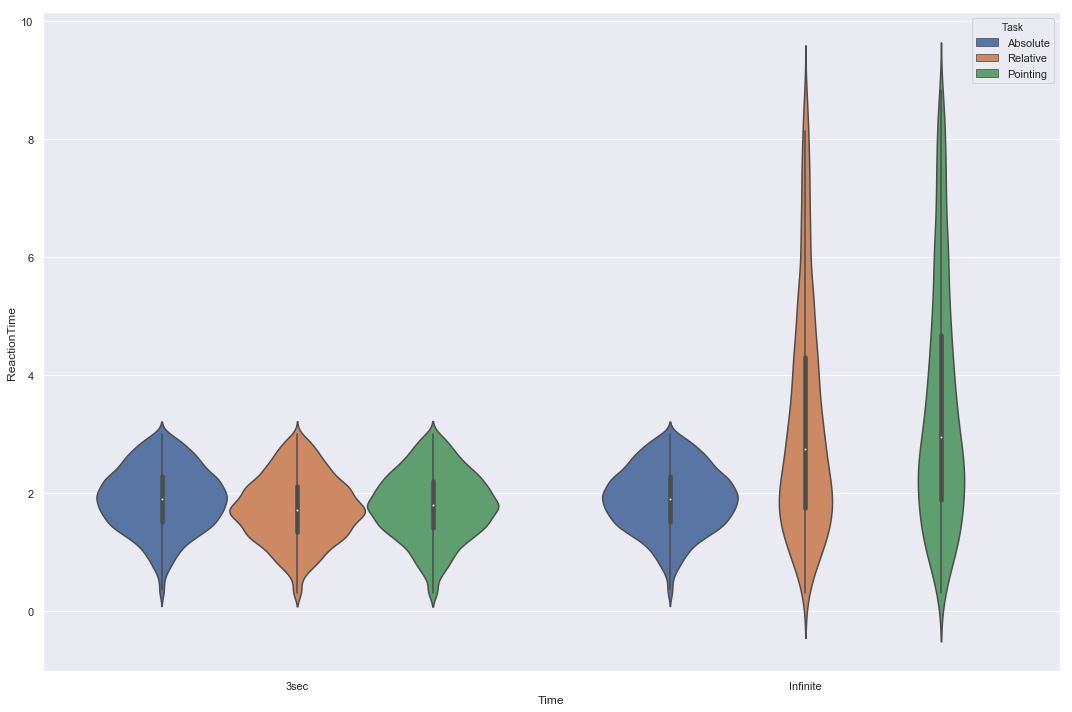

In [16]:
std =clean_data.groupby(['Task','Time'])['ReactionTime'].std()
means['std'] = std.values

#get bool-array with fitting RT-values
outliers = np.abs(stats.zscore(clean_data['ReactionTime'])) <=2
#mask dataframe with bool-array 
normalized_data = clean_data[outliers]

#plotting 
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(data = normalized_data, y = 'ReactionTime',x='Time', hue= 'Task')

fig.tight_layout()
#calculate new means for better evaluation of data
means = pd.DataFrame()

means['MeanRT'] = normalized_data.groupby(['Task','Time'])['ReactionTime'].mean()
means = means.reset_index()

print("Even after the removal of outliers, the data of the realtive- and the pointing-task are  still skewed to higher RTs \n\n",means)

**Please make sure that you use the preprocessed data without outliers for the following assignments!**

## Assignment 2: Checking for possible hypotheses [5 pts]

### a) Hypothesis 1 [2 pt]

**Hypothesis 1:** "Given that subjects are limited by time, if they are faster in RT they are also less accurate."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a scatterplot of the mean RT (x-axis) and the accuracy (y-axis) for the time condition "3sec". 
- Make a second scatterplot and add a simple linear regression line to it. Calculate the slope of the regression line (you are allowed to use scipy). 
- Considering your results, what can you say about the hypothesis?

In [93]:
#get data of relative task and preprocess them as in 1
relative = pd.read_excel('Seahaven_dataset.xlsx',sheet_name='RelativeTask')
#load defined columns
relative = relative[['ReactionTime', 'AngularDiffBin', 'Subject', 'Task', 'Time', 'Answer' , 'Measurement']]
#drop NaN's
clean_relative = relative.dropna()
#convert Answers into bool's
clean_relative['Answer'] = (clean_relative['Answer'] != 'wrong').astype(int)
#get bool-array with fitting RT-values
outliers = np.abs(stats.zscore(clean_relative['ReactionTime'])) <=2
#mask dataframe with bool-array 
normalized_relative = clean_relative[outliers]


C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The calculated slope is: 0.7004595053925124 . So we conclude, that the hypothesis could be true, because with higher RT the participants are getting less accurate, but as the slope is pretty small, the  linear regression is not a clear evidence for that.


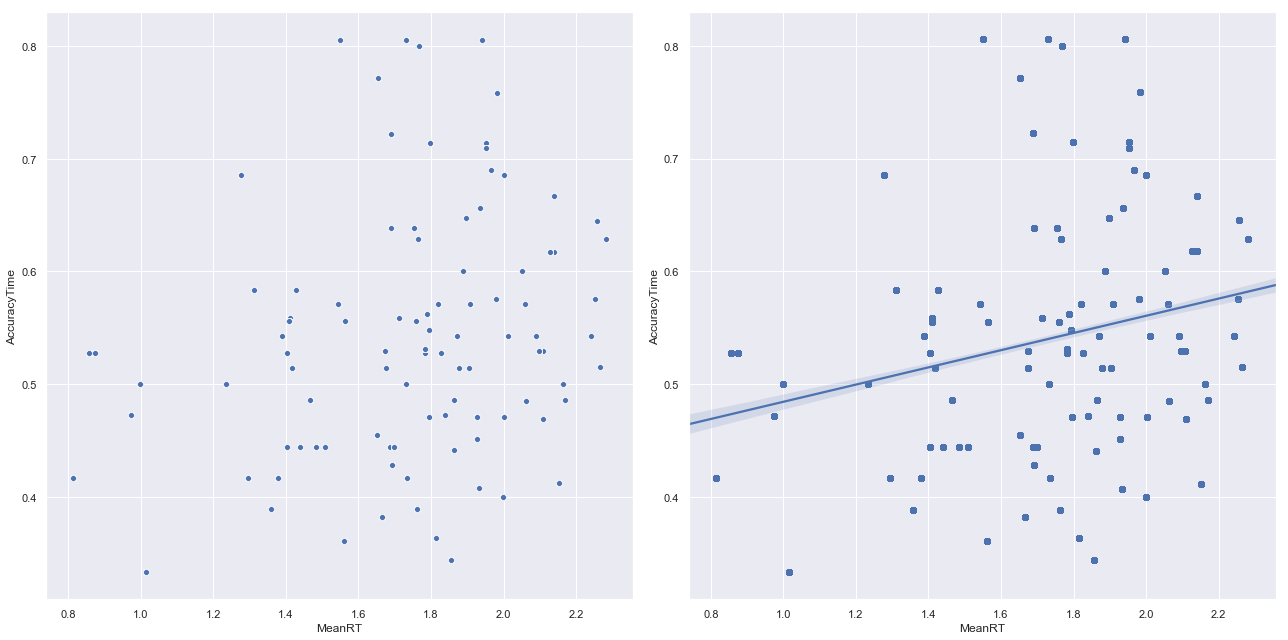

In [94]:
#use data from relative task and add new columns to it
hyp_1 = normalized_relative

#get the mean Reactiontimes of similar Subject and Time
hyp_1['MeanRT'] = hyp_1.groupby(['Time','Subject'])['ReactionTime'].transform('mean')
#get the mean Answers of same Subject and Time
hyp_1['AccuracyTime'] = hyp_1.groupby(['Time','Subject'])['Answer'].transform('mean')

#masking the time = 3sec
specific_time=  hyp_1['Time']=="3sec"
specific_time = hyp_1[specific_time]

#plotting
fig, ax = plt.subplots(figsize=(18,9),ncols=2)
sns.scatterplot(data = specific_time, y = 'AccuracyTime',x='MeanRT', ax= ax[0])
sns.regplot(data = specific_time, y = 'AccuracyTime',x='MeanRT',ax=ax[1])

fig.tight_layout()
# get the slope with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(specific_time['MeanRT'],specific_time['AccuracyTime'])

print("The calculated slope is:" ,slope,". So we conclude, that the hypothesis could be true, because with higher RT the participants are getting less accurate, but as the slope is pretty small, the  linear regression is not a clear evidence for that.")

### b) Hypothesis 2 [1 pt]

**Hypothesis 2:** "Given that subjects have infinite time, they perform better."

- Use the data of all three tasks.
- For each task (Absolute, Relative, Pointing) and time condition (3sec, Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the tasks (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

The data shows slightly better performance in the relative and pointing task, given infinite time, 
but the ruslts are not significant. 


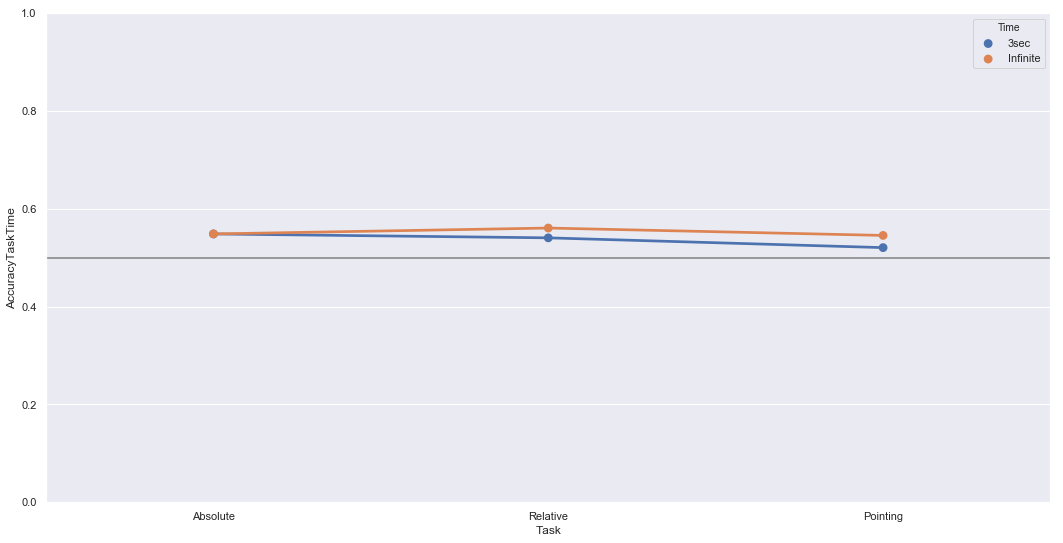

In [95]:
#use data from all three tasks and add new columns to it
hyp_2 = normalized_data
#get the Answers of same Task and Time
hyp_2['AccuracyTaskTime'] = hyp_2.groupby(['Time','Task'])['Answer'].transform('mean')

#plotting
fig, ax = plt.subplots(figsize=(18,9))
pointplot = sns.pointplot(x="Task", y="AccuracyTaskTime", hue='Time', data=hyp_2)
#set y-axis in correct condition
pointplot.set(ylim=(0, 1))
# add line at o.5
pointplot.axhline(0.5, color='grey')

print("The data shows slightly better performance in the relative & pointing task, given infinite time, \nbut the results are not significant. ")

### d) Hypothesis 3 [1 pt]

**Hypothesis 3:** "With each subsequent session subjects get better in performance."

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the mean RT and Accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the measurement (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance.
- Hint: Play with the keyword dodge.
- Make also a pointplot of the measurement (x-axis) and RT (y-axis) for both time conditions (3sec / Infinite).  Make sure that the data is displayed clearly. You may split up the single plots for a better overview.
- Considering your plots, what can you say about the hypothesis?

We can observe that the performance is getting better in form of smaller Reactiontime but there is no significan increase
 in Accuracy.


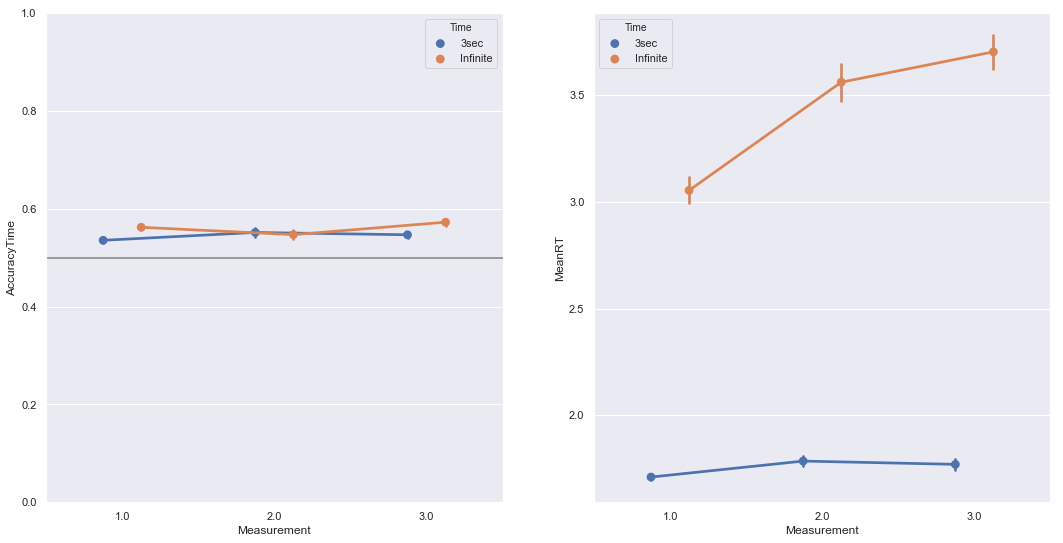

In [96]:
#use data from relative task and add new columns to it
hyp_3 = hyp_1

#plotting
fig, ax = plt.subplots(figsize=(18,9),ncols=2)

# plotting accuracy
accuracy = sns.pointplot(x="Measurement", y="AccuracyTime", hue='Time', data=hyp_3,ax=ax[0],dodge= 0.25)
#define y-axis
accuracy.set(ylim=(0, 1))
#add line at 0.5
accuracy.axhline(0.5, color= 'grey')

# ploting RT's
meanRT = sns.pointplot(x="Measurement", y="MeanRT", hue='Time', data=hyp_3,  ax=ax[1],dodge = 0.25)

print("We can observe that the performance is getting better in form of smaller Reactiontime but there is no significan increase\n in Accuracy.")

### c) Hypothesis 4 [1 pts]

**Hypothesis 4:** "When the angular difference between houses increases subjects are more accurate in the relative task."

- Use the data of the relative task.
- For each angular difference (see "AngularDiffBin") calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Make a pointplot of the angular differences (x-axis) and the accuracy (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.0 and end at 1.0.
- For better comparison print both conditions in one plot and add a line at accuracy=0.5 to check if the results are above chance. Make sure that the angular differences are displayed in ascending order.
- Hint: Play with the keyword dodge.
- Considering your plots, what can you say about the hypothesis?

C:\Users\Victoria Benhauser\Anaconda\envs\acc\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The accuracy sligthly increases with ascending angularsize but it's also decreasing sligthly after app. 150 again for both tie conditions. So there is no evidence aht the hypothesis 4 is true.


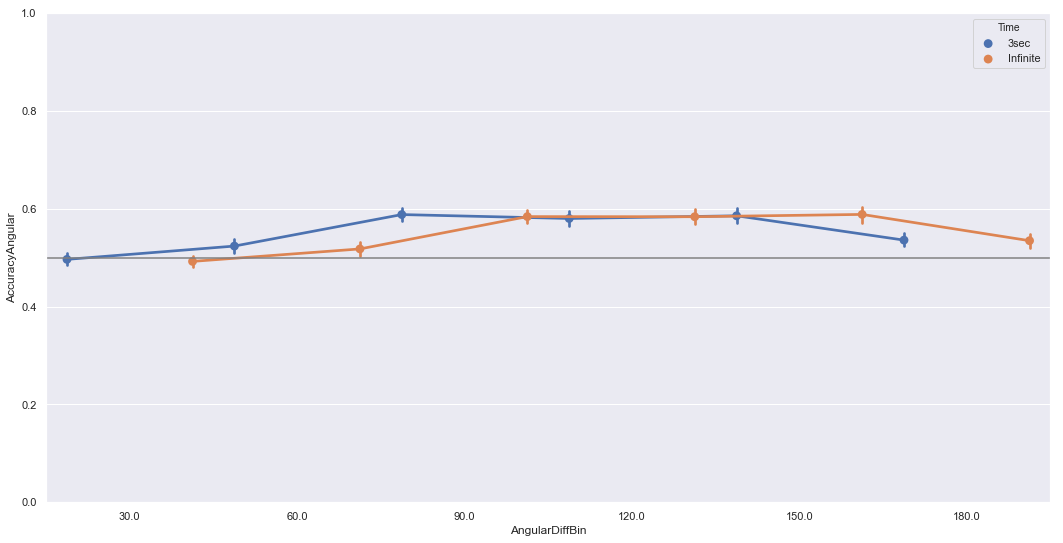

In [98]:
#use data from relative task and add new columns to it
hyp_4 = hyp_3
#calculate accuracy-angular relation
hyp_4['AccuracyAngular'] = hyp_4.groupby(['Subject','AngularDiffBin'])['Answer'].transform('mean')
#plotting
fig,ax = plt.subplots(figsize=(18,9))
acc_ang = sns.pointplot(x ="AngularDiffBin" , y = "AccuracyAngular" , hue = "Time", data = hyp_4,dodge=0.75 )
#define y-axis
acc_ang.set(ylim=(0, 1))
#add line at 0.5
acc_ang.axhline(0.5, color= 'grey')

print("The accuracy sligthly increases with ascending angularsize but it's also decreasing sligthly after app. 150 again for both tie conditions. So there is no evidence aht the hypothesis 4 is true.") 

## Assignment 3: T-test [2 pts]

We will perform a two-sample t-test, i.e. we compare the mean of two groups under the assumption that both are independent and normally distributed with unknown but equal variances. In this case we will look at the data of the relative task and compare the accuracies of the two time conditions (3sec / Infinte). We will ignore that there are different measurement days!

- Use the data of the relative task.
- For each time condition (3sec / Infinite) calculate the accuracy per subject. Rename the column "Answer" to "Accuracy" (the accuracy corresponds to the averaged answer-values).
- Check if the data is normally distributed using scipy.stats.normaltest.


- Compute the t-statistics: $ t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

$\bar{x}_1$: mean accuracy of all subjects for time condition "3sec" <br>
$\bar{x}_2$: mean accuracy of all subjects for time condition "Infinite" <br>
$n_1$: sample size for time condition "3sec" <br>
$n_2$: sample size for time condition "Infinite"


- with $ s^2 = \frac{\sum_{i=1}^n{(x_i - \bar{x})^2}}{n-1} $

$x_i$: accuracy of subject i <br>
$\bar{x}$: mean accuracy of all subjects <br>
$n$: sample size


- Calculate the degrees of freedom: $ df = n_1 + n_2 -2 $
- What does the p-value of a t-test tell you in general? Also explain what your calculated p-value tells you specifically (given $\alpha = 0.05$)?

In [ ]:
# TODO

# gives you the p-value after comparing the t-statistic with the critical t value (computed internally) 
p = 1 - stats.t.cdf(t,df=df)

print("t = " + str(t))
print("p = " + str(2*p))

# test if your calculation is correct
t2, p2 = stats.ttest_ind(x1,x2)
print("t = " + str(t2))
print("p = " + str(p2))

